In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import logistic

from polling_simulator import Demographic, Variable, generate_electorate, run_elections, run_polls
from polling_simulator.aggregation import naive_aggregation, stratified_aggregation, weight_by_self_reported_turnout
from polling_simulator.distributions import truncated_gaussian_distribution
from polling_simulator.sampling import predefined_sample

original_palette = sns.color_palette()
modified_palette = [original_palette[0], original_palette[3]]
sns.set_palette(modified_palette)

The electorate isn't a uniform blob like it was in the first example, but rather contains many different groups which may have different candidate preferences as well as different ways to interact with the polls. Let's set up another example, this time using different demographics based on age.

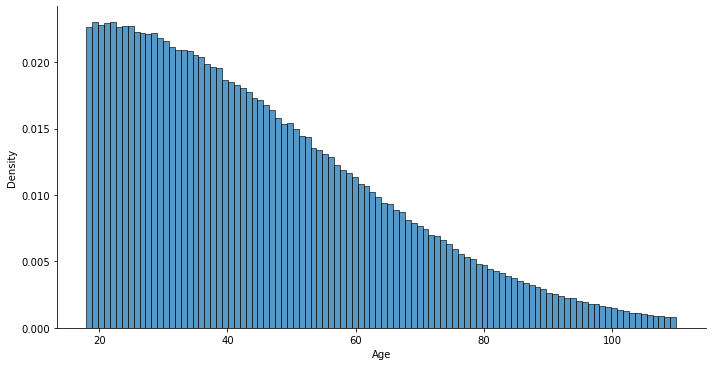

In [2]:
np.random.seed(123)
age = Variable("age", truncated_gaussian_distribution(18, 35, 18, 110))

random_ages = age.data_generator(1000000)
fig = sns.displot(random_ages, bins=100, stat="density", height=5, aspect=2)
fig.set(xlabel="Age")

Text(0, 0.5, 'Fraction Supporting Republicans')

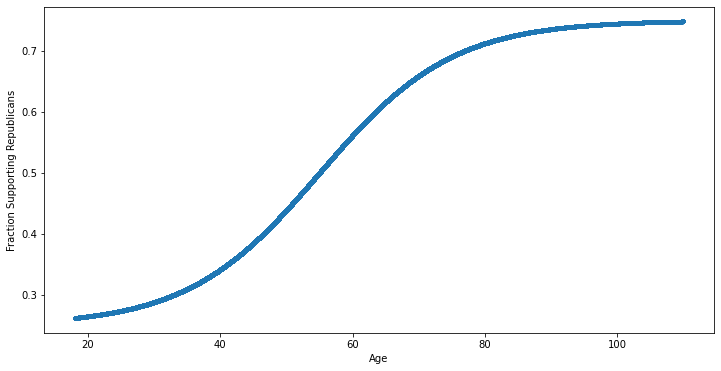

In [3]:
rep_support = logistic.cdf(random_ages, loc=55, scale=10) / 2 + 0.25
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(random_ages, rep_support, ls="None", marker=".")
ax.set_xlabel("Age")
ax.set_ylabel("Fraction Supporting Republicans")

In [4]:
sns.histplot?

<AxesSubplot:xlabel='Age', ylabel='Density'>

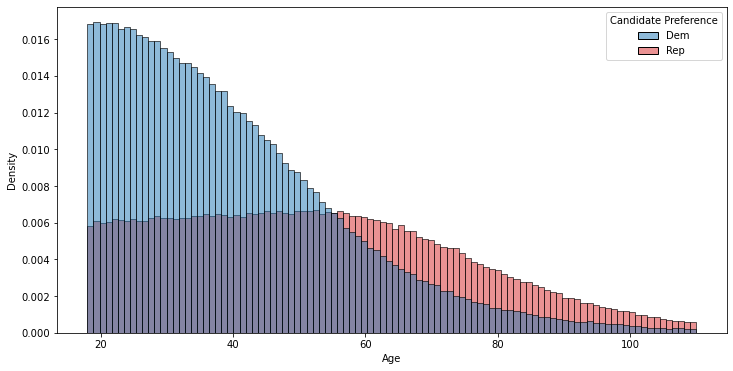

In [5]:
republican_supporter = np.random.random(len(rep_support)) < rep_support
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(
    pd.DataFrame({"Age": random_ages, "Candidate Preference": np.where(republican_supporter, "Rep", "Dem")}), 
    x="Age", hue="Candidate Preference", hue_order=["Dem", "Rep"], stat="density",
    bins=100
)

<AxesSubplot:xlabel='Age', ylabel='Density'>

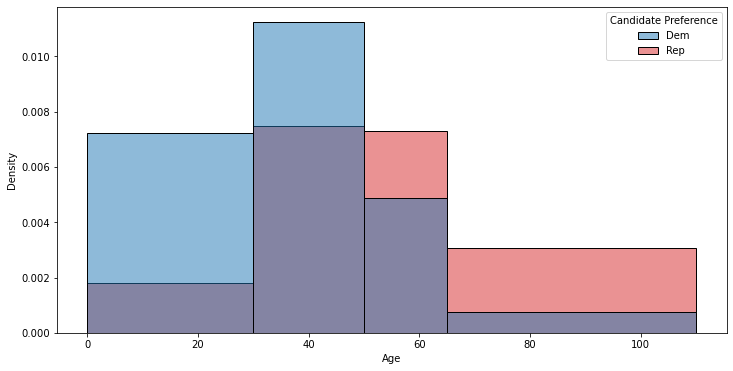

In [7]:
def demographics(input_age):
    republican_supporter = np.ones(len(input_age)) * 0.2
    republican_supporter[(input_age >= 30) & (input_age < 50)] = 0.4
    republican_supporter[(input_age >= 50) & (input_age < 65)] = 0.6
    republican_supporter[(input_age >= 65)] = 0.8
    return republican_supporter

republican_supporter = np.random.random(len(random_ages)) < demographics(random_ages)

fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(
    pd.DataFrame({"Age": random_ages, "Candidate Preference": np.where(republican_supporter, "Rep", "Dem")}), 
    x="Age", hue="Candidate Preference", hue_order=["Dem", "Rep"], stat="density",
    bins=[0, 30, 50, 65, 110]
)
    